In [1]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-02-08 14:57:01,216 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-02-08 14:57:01,217 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-02-08 14:57:01,218 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-02-08 14:57:01,218 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-02-08 14:57:01,218 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def slicep(direction, ray1=False, ray2=False):
    
    get_cmap("cet_bmw")
    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.set_cmap(("density"), "cet_bmw")
    
    if ray1==True:
        sl.annotate_ray(ray_, arrow=True)
    if ray2==True:
        sl.annotate_ray(ray_2, arrow=True)
    
    sl.show()

In [5]:
def spec_avg(x0, y0, z0, x, y, z, Nx, Nz,
             line, lmin, lmax,
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, amu=None,
             DIY=False, ind_p=True):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Nx):
        for j in range(Nz):
        
            ray_start = np.array([x0+(i*cu),y0,z0+(j*cu)])*k
            ray_end = np.array([x+(i*cu),y,z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Nx*Nz): # N = Nx * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    reds = get_cmap('cet_CET_L18')
    colors = reds(np.linspace(0.25,1,Nx*Nz))
        
    fig = plt.figure(figsize=(15, 5))
    
    if ind_p==True:
        for p in range(Nx*Nz):
            plt.plot(arrays[0][0], arrays[p][1], alpha=0.5, color=colors[p])
    else:
        pass
    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line+" '140.h5.0'")
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    
    return arrays[0][0], avg
    

In [20]:
def get_N(a0, a):
    return (a-a0)*256

# Slice Plot units to Projection Plot units
def stp_z(z):
    return(z*10)-5

def stp_x(x):
    return (x*10)-10

yt : [INFO     ] 2022-02-08 16:14:29,930 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:14:29,933 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:14:30,582 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-02-08 16:14:30,658 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:14:30,659 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:14:30,659 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:14:30,659 Parameters: domain_right_edge   


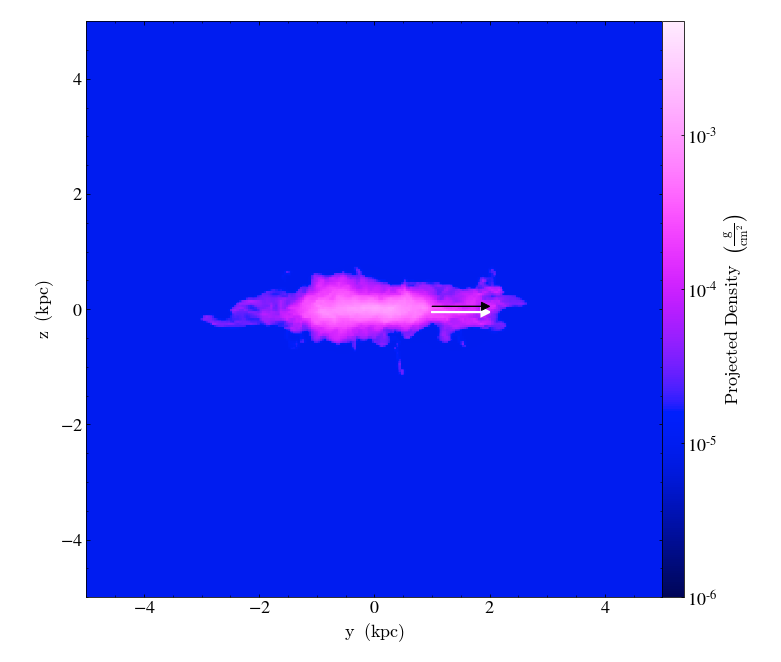

yt : [INFO     ] 2022-02-08 16:14:37,934 Projection completed
yt : [INFO     ] 2022-02-08 16:14:37,934 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:14:37,934 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:14:37,935 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:14:37,935 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:14:37,936 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


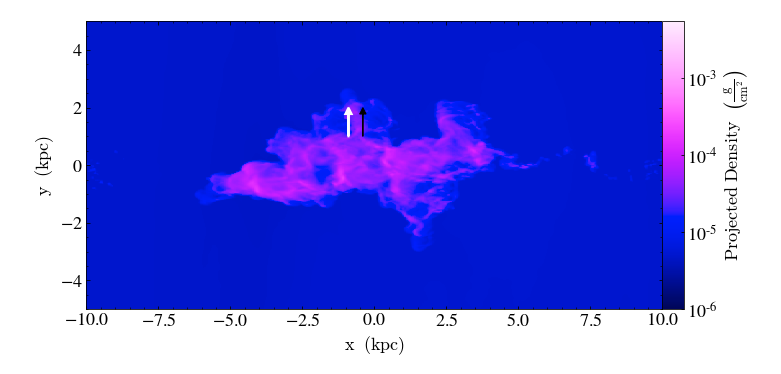

yt : [INFO     ] 2022-02-08 16:14:41,351 Projection completed
yt : [INFO     ] 2022-02-08 16:14:41,352 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:14:41,352 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:14:41,353 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:14:41,353 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:14:41,354 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


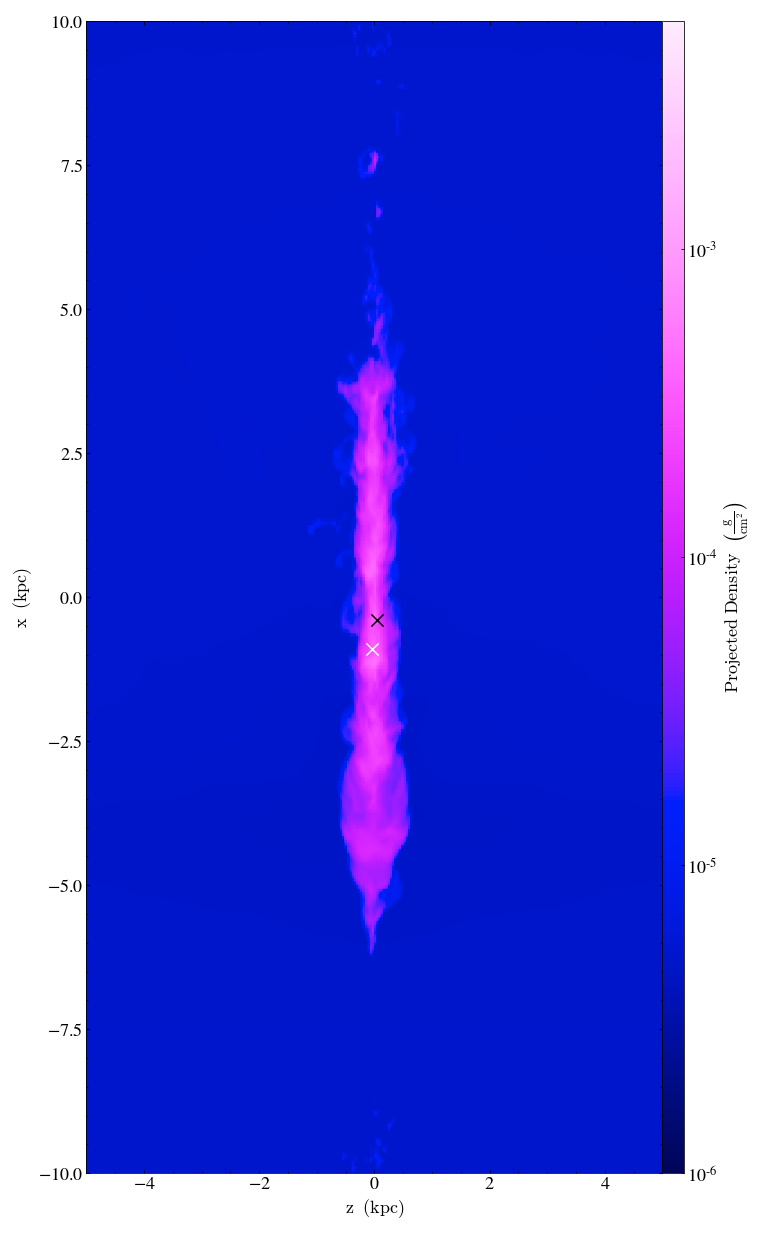

In [26]:
ray1 = make_ray(0.91,0.6,0.495,0.91,0.7,0.495)
ray2 = make_ray(0.96,0.6,0.505,0.96,0.7,0.505)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.05,-0.9), coord_system="plot", plot_args={"color":"white", "s": 150})
py.annotate_marker((0.05, -0.4), coord_system="plot", plot_args={"color":"black", "s": 150})
py.show()

In [24]:
stp_x(0.96)

-0.40000000000000036

In [23]:
stp_x(0.91)

-0.9000000000000004

In [19]:
nxs = get_N(0.91, 0.96)
nzs = get_N(0.495, 0.505)

print(nxs, nzs)

12.799999999999983 2.5600000000000023


## C IV

yt : [INFO     ] 2022-02-08 16:17:06,415 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
yt : [INFO     ] 2022-02-08 16:17:06,417 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:17:07,068 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:17:07,146 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:17:07,146 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:17:07,147 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:17:07,147 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:17:07,147 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:17:07,148 Setting instrument to Custom
yt : 

yt : [INFO     ] 2022-02-08 16:17:10,912 Getting subsegment: [0.456953125 unitary, 0.3 unitary, 0.25140625 unitary] to [0.456953125 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:17:11,556 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:17:11,632 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:17:11,632 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:17:11,632 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:17:11,633 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:17:11,633 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:17:11,634 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:17:11,645 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:17:11,649 Identified 3.300e+01 octs
yt 

yt : [INFO     ] 2022-02-08 16:17:16,072 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:17:16,151 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:17:16,152 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:17:16,152 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:17:16,153 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:17:16,153 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:17:16,154 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:17:16,165 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:17:16,168 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:17:16,254 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:17:16,257 Creating spectrum
Addi

yt : [INFO     ] 2022-02-08 16:17:20,562 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:17:20,562 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:17:20,563 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:17:20,563 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:17:20,564 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:17:20,574 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:17:20,578 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:17:20,666 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:17:20,669 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 27/27 [00:00<00:00, 4425.24it/s]
yt : [INFO     ] 2022-02-08 16:17:20,712 Writing spectrum to ascii file: spec.txt.
yt : 

yt : [INFO     ] 2022-02-08 16:17:24,823 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:17:24,823 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:17:24,824 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:17:24,834 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:17:24,837 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:17:24,984 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:17:24,987 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 27/27 [00:00<00:00, 4554.63it/s]
yt : [INFO     ] 2022-02-08 16:17:25,027 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:17:25,042 Getting segment at z = 0.0: [0.46867188 0.3        0.2475    ] unitary to [0.46867188 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:17:25,04

yt : [INFO     ] 2022-02-08 16:17:29,075 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:17:29,085 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:17:29,088 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:17:29,174 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:17:29,177 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3902.35it/s]
yt : [INFO     ] 2022-02-08 16:17:29,218 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:17:29,233 Getting segment at z = 0.0: [0.470625   0.3        0.25140625] unitary to [0.470625   0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:17:29,234 Getting subsegment: [0.47062500000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47062500000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:17:29,837 Saving field dat

yt : [INFO     ] 2022-02-08 16:17:33,325 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:17:33,410 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:17:33,413 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3103.15it/s]
yt : [INFO     ] 2022-02-08 16:17:33,458 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:17:33,473 Getting segment at z = 0.0: [0.47453125 0.3        0.24945312] unitary to [0.47453125 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:17:33,474 Getting subsegment: [0.47453125 unitary, 0.3 unitary, 0.249453125 unitary] to [0.47453125 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:17:34,067 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:17:34,145 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:17:34,145 Parameters: domain_dimensions

yt : [INFO     ] 2022-02-08 16:17:37,658 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3656.52it/s]
yt : [INFO     ] 2022-02-08 16:17:37,700 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:17:37,715 Getting segment at z = 0.0: [0.4784375 0.3       0.2475   ] unitary to [0.4784375 0.35      0.2475   ] unitary.
yt : [INFO     ] 2022-02-08 16:17:37,716 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:17:38,315 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:17:38,391 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:17:38,391 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:17:38,392 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:1

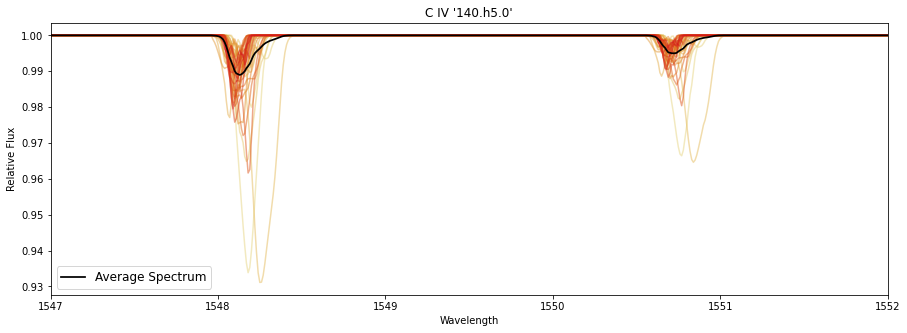

In [29]:
CIV = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'C IV' ,1547,1552)

## Ly a

yt : [INFO     ] 2022-02-08 16:18:19,432 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:18:19,434 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:18:20,071 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:18:20,148 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:18:20,148 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:20,149 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:20,149 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:18:24,240 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:18:24,267 Getting segment at z = 0.0: [0.45695313 0.3        0.25140625] unitary to [0.45695313 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:18:24,268 Getting subsegment: [0.456953125 unitary, 0.3 unitary, 0.25140625 unitary] to [0.456953125 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:18:24,899 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:18:24,975 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:18:24,975 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:24,976 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:24,976 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:24,976 Parameters: cosmological_simulation   = 0.0
yt

yt : [INFO     ] 2022-02-08 16:18:29,065 Getting segment at z = 0.0: [0.46085938 0.3        0.24945312] unitary to [0.46085938 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:18:29,066 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:18:29,691 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:18:29,767 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:18:29,768 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:29,768 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:29,768 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:29,769 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:29,770 Setting instrument to Cust

yt : [INFO     ] 2022-02-08 16:18:33,863 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:18:34,503 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:18:34,582 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:18:34,583 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:34,583 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:34,584 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:34,584 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:34,585 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:18:34,596 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:18:34

yt : [INFO     ] 2022-02-08 16:18:39,346 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:18:39,422 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:18:39,423 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:39,423 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:39,423 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:39,424 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:39,425 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:18:39,434 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:18:39,438 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:18:39,526 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:18:39,529 Creating spectrum
Adding 

yt : [INFO     ] 2022-02-08 16:18:44,244 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:18:44,244 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:44,244 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:44,245 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:44,246 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:18:44,257 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:18:44,261 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:18:44,350 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:18:44,353 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 27/27 [00:00<00:00, 380.55it/s]
yt : [INFO     ] 2022-02-08 16:18:44,455 Not adding continuum Ly C: insufficient column density o

yt : [INFO     ] 2022-02-08 16:18:48,955 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:18:48,956 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:48,956 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:48,957 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:18:48,968 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:18:48,971 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:18:49,062 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:18:49,065 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 27/27 [00:00<00:00, 566.39it/s]
yt : [INFO     ] 2022-02-08 16:18:49,143 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-02-08 16:18:49,144 Writing spectrum to ascii file: s

yt : [INFO     ] 2022-02-08 16:18:53,628 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:18:53,628 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:18:53,629 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:18:53,639 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:18:53,643 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:18:53,731 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:18:53,735 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 27/27 [00:00<00:00, 441.99it/s]
yt : [INFO     ] 2022-02-08 16:18:53,828 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-02-08 16:18:53,829 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:18:53,857 Getting segment at z = 0.0: [0.4784375 0.3       0.247

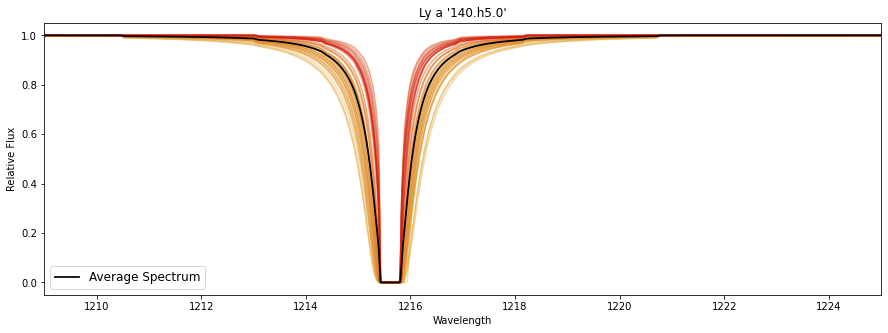

In [30]:
HI = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Ly a' ,1209,1225)

## O I 1302

yt : [INFO     ] 2022-02-08 16:20:18,403 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:20:18,405 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:19,041 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:19,121 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:19,121 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:19,122 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:19,122 Parameters: domain_right_edge    

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3452.31it/s]
yt : [INFO     ] 2022-02-08 16:20:21,432 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:21,443 Getting segment at z = 0.0: [0.45695313 0.3        0.2475    ] unitary to [0.45695313 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:21,444 Getting subsegment: [0.456953125 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.456953125 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:22,088 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:22,163 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:22,164 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:22,164 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:22,164 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3391.21it/s]
yt : [INFO     ] 2022-02-08 16:20:24,383 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:24,394 Getting segment at z = 0.0: [0.45890625 0.3        0.2475    ] unitary to [0.45890625 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:24,395 Getting subsegment: [0.45890625000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45890625000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:25,030 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:25,110 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:25,111 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:25,111 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:25,112 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3457.48it/s]
yt : [INFO     ] 2022-02-08 16:20:27,330 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:27,341 Getting segment at z = 0.0: [0.46085938 0.3        0.2475    ] unitary to [0.46085938 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:27,342 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:27,968 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:28,044 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:28,044 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:28,044 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:28,045 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3100.94it/s]
yt : [INFO     ] 2022-02-08 16:20:30,328 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:30,339 Getting segment at z = 0.0: [0.4628125 0.3       0.2475   ] unitary to [0.4628125 0.35      0.2475   ] unitary.
yt : [INFO     ] 2022-02-08 16:20:30,341 Getting subsegment: [0.4628125 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.4628125 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:30,965 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:31,045 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:31,046 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:31,046 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:31,046 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] c

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2956.36it/s]
yt : [INFO     ] 2022-02-08 16:20:33,274 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:33,284 Getting segment at z = 0.0: [0.46476563 0.3        0.2475    ] unitary to [0.46476563 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:33,285 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:33,909 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:33,987 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:33,987 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:33,988 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:33,988 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2773.81it/s]
yt : [INFO     ] 2022-02-08 16:20:36,286 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:36,297 Getting segment at z = 0.0: [0.46671875 0.3        0.2475    ] unitary to [0.46671875 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:36,298 Getting subsegment: [0.46671875000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.46671875000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:36,924 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:37,002 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:37,002 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:37,003 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:37,003 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2743.37it/s]
yt : [INFO     ] 2022-02-08 16:20:39,182 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:39,192 Getting segment at z = 0.0: [0.46867188 0.3        0.2475    ] unitary to [0.46867188 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:39,193 Getting subsegment: [0.468671875 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.468671875 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:39,814 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:39,890 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:39,891 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:39,891 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:39,891 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2835.83it/s]
yt : [INFO     ] 2022-02-08 16:20:42,092 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:42,103 Getting segment at z = 0.0: [0.470625 0.3      0.2475  ] unitary to [0.470625 0.35     0.2475  ] unitary.
yt : [INFO     ] 2022-02-08 16:20:42,106 Getting subsegment: [0.47062500000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47062500000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:42,727 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:42,805 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:42,805 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:42,806 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:42,806 Parameters: domain_right_edge         = [6.172e+22 3.086e+2

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2990.79it/s]
yt : [INFO     ] 2022-02-08 16:20:45,071 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:45,083 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:45,084 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:45,701 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:45,778 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:45,778 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:45,778 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:45,779 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3236.62it/s]
yt : [INFO     ] 2022-02-08 16:20:48,232 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:48,243 Getting segment at z = 0.0: [0.47453125 0.3        0.2475    ] unitary to [0.47453125 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:48,244 Getting subsegment: [0.47453125 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47453125 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:48,854 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:48,930 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:48,930 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:48,931 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:48,931 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.08

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3073.75it/s]
yt : [INFO     ] 2022-02-08 16:20:51,129 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:51,140 Getting segment at z = 0.0: [0.47648438 0.3        0.2475    ] unitary to [0.47648438 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:20:51,141 Getting subsegment: [0.47648437500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47648437500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:51,766 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:51,842 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:51,842 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:51,843 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:51,843 Parameters: domain_right_edge         = [6.172e

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3275.57it/s]
yt : [INFO     ] 2022-02-08 16:20:54,041 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:20:54,051 Getting segment at z = 0.0: [0.4784375 0.3       0.2475   ] unitary to [0.4784375 0.35      0.2475   ] unitary.
yt : [INFO     ] 2022-02-08 16:20:54,052 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:54,684 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:54,763 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:54,764 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:54,764 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:54,764 Parameters: domain_right_edge         = [6.172e+22 3.

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3261.61it/s]
yt : [INFO     ] 2022-02-08 16:20:56,958 Writing spectrum to ascii file: spec.txt.


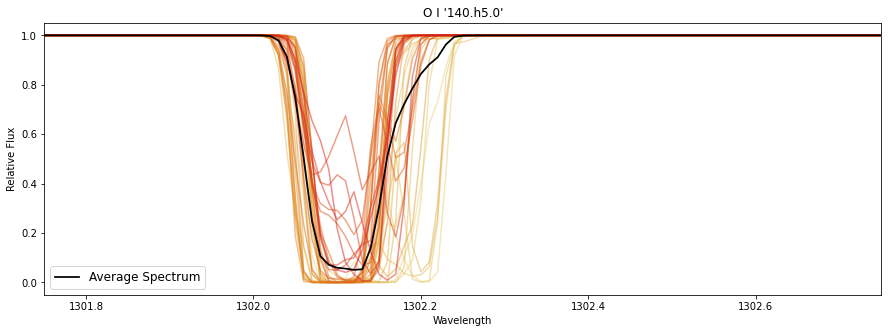

In [32]:
OI1302 = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'O I' ,1301.75,1302.75)

## Si II 1304

yt : [INFO     ] 2022-02-08 16:20:57,108 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:20:57,109 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:20:57,735 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:20:57,812 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:20:57,812 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:20:57,812 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:20:57,813 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:21:02,277 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:02,278 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:02,278 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:02,279 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:02,279 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:02,280 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:02,291 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:02,295 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:02,383 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:02,385 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1918

yt : [INFO     ] 2022-02-08 16:21:06,736 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:06,740 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:06,824 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:06,827 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1556.31it/s]
yt : [INFO     ] 2022-02-08 16:21:06,872 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:06,883 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:21:06,884 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:21:07,528 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:07,607 Pa

yt : [INFO     ] 2022-02-08 16:21:11,292 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:21:11,916 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:11,991 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:11,992 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:11,992 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:11,992 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:11,993 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:11,994 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:12,003 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:12,007 Identified 

yt : [INFO     ] 2022-02-08 16:21:16,350 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:16,351 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:16,351 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:16,361 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:16,365 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:16,450 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:16,453 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1718.53it/s]
yt : [INFO     ] 2022-02-08 16:21:16,496 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:16,507 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:21:16,

Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1605.40it/s]
yt : [INFO     ] 2022-02-08 16:21:20,960 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:20,971 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:21:20,972 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:21:21,605 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:21,682 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:21,683 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:21,683 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:21,683 Parameters: domain_right_edge         = [6.

yt : [INFO     ] 2022-02-08 16:21:26,216 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:26,217 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:26,217 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:26,217 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:26,218 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:26,218 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:26,230 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:26,234 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:26,324 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:26,327 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1700

yt : [INFO     ] 2022-02-08 16:21:30,536 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:30,540 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:30,630 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:30,633 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1650.87it/s]
yt : [INFO     ] 2022-02-08 16:21:30,679 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:30,690 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:21:30,691 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:21:31,312 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:31,391 Pa

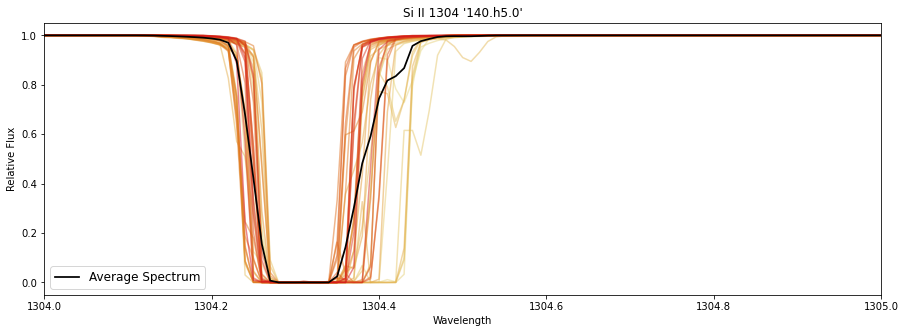

In [33]:
Si1304 = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Si II 1304' ,1304,1305)

## C II 1335

yt : [INFO     ] 2022-02-08 16:21:31,772 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:21:31,774 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:21:32,424 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:32,504 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:32,504 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:32,505 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:32,505 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:21:36,873 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:36,873 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:36,874 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:36,874 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:36,874 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:36,875 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:36,885 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:36,889 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:36,975 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:36,978 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2227.2

yt : [INFO     ] 2022-02-08 16:21:41,166 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:41,170 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:41,255 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:41,258 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1789.41it/s]
yt : [INFO     ] 2022-02-08 16:21:41,302 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:41,312 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:21:41,313 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:21:41,921 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:41,996 Para

yt : [INFO     ] 2022-02-08 16:21:45,682 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:21:46,330 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:46,405 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:46,405 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:46,405 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:46,406 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:46,406 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:46,407 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:46,416 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:46,420 Identified 

yt : [INFO     ] 2022-02-08 16:21:50,833 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:21:50,833 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:21:50,835 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:21:50,846 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:21:50,849 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:21:50,937 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:21:50,940 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1962.06it/s]
yt : [INFO     ] 2022-02-08 16:21:50,983 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:50,993 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:21:50,99

Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1830.12it/s]
yt : [INFO     ] 2022-02-08 16:21:55,477 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:21:55,488 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:21:55,489 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:21:56,132 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:21:56,213 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:21:56,213 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:21:56,214 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:21:56,214 Parameters: domain_right_edge         = [6.1

yt : [INFO     ] 2022-02-08 16:22:00,652 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:00,652 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:00,653 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:00,653 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:22:00,653 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:22:00,654 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:22:00,664 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:00,667 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:00,751 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:00,754 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1807.5

yt : [INFO     ] 2022-02-08 16:22:04,940 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:04,943 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:05,029 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:05,032 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1862.48it/s]
yt : [INFO     ] 2022-02-08 16:22:05,073 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:22:05,083 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:22:05,084 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:22:05,714 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:05,789 Para

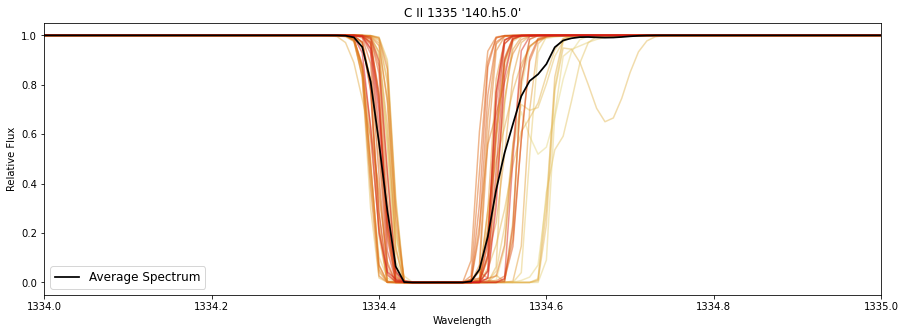

In [34]:
CII1335 = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'C II 1335' ,1334,1335)

## Si IV 1393

yt : [INFO     ] 2022-02-08 16:22:06,149 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:22:06,150 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:22:06,788 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:06,863 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:06,863 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:06,863 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:06,864 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:22:11,165 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:11,165 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:11,166 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:11,166 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:22:11,166 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:22:11,167 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:22:11,177 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:11,181 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:11,264 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:11,267 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 3034

yt : [INFO     ] 2022-02-08 16:22:15,530 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:15,534 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:15,618 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:15,620 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2726.20it/s]
yt : [INFO     ] 2022-02-08 16:22:15,657 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:22:15,667 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:22:15,668 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:22:16,305 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:16,382 Pa

yt : [INFO     ] 2022-02-08 16:22:19,918 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:22:20,552 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:20,637 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:20,637 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:20,638 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:20,638 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:22:20,638 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:22:20,639 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:22:20,650 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:20,654 Identified 

yt : [INFO     ] 2022-02-08 16:22:25,061 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:22:25,061 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:22:25,062 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:22:25,072 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:25,076 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:25,169 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:25,172 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2300.82it/s]
yt : [INFO     ] 2022-02-08 16:22:25,222 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:22:25,236 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:22:25,

Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2434.67it/s]
yt : [INFO     ] 2022-02-08 16:22:29,718 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:22:29,730 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:22:29,732 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:22:30,370 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:30,447 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:30,447 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:30,448 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:30,448 Parameters: domain_right_edge         = [6.

yt : [INFO     ] 2022-02-08 16:22:34,881 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:22:34,881 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:22:34,882 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:22:34,882 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:22:34,882 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:22:34,883 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:22:34,893 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:34,897 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:35,060 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:35,063 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2472

yt : [INFO     ] 2022-02-08 16:22:39,374 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:22:39,378 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:22:39,464 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:22:39,467 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2608.16it/s]
yt : [INFO     ] 2022-02-08 16:22:39,505 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:22:39,515 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:22:39,516 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:22:40,154 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:22:40,229 Pa

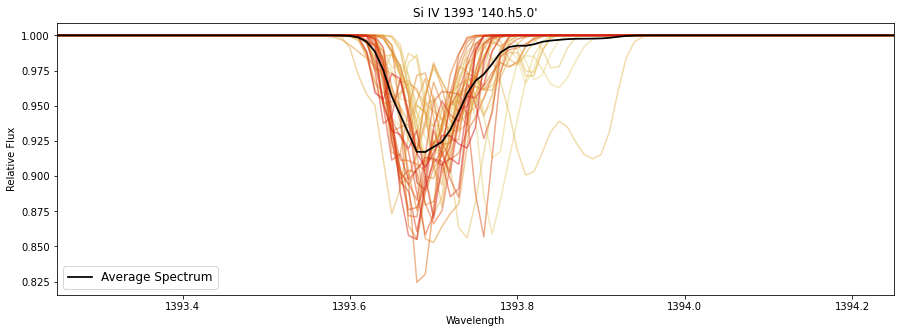

In [35]:
SiIV1393 = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Si IV 1393',1393.25,1394.25,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True)

## Al III 1854

yt : [INFO     ] 2022-02-08 16:24:22,591 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:24:22,592 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:24:23,210 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:24:23,290 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:24:23,290 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:24:23,290 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:24:23,291 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:24:27,566 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:24:27,567 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:24:27,567 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:24:27,567 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:24:27,568 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:24:27,569 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:24:27,580 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:27,584 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:24:27,669 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:24:27,672 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 274

yt : [INFO     ] 2022-02-08 16:24:31,905 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:31,909 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:24:31,995 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:24:31,998 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2409.80it/s]
yt : [INFO     ] 2022-02-08 16:24:32,037 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:24:32,048 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:24:32,049 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:24:32,654 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:24:32,731 P

yt : [INFO     ] 2022-02-08 16:24:36,310 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:24:36,935 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:24:37,012 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:24:37,012 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:24:37,013 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:24:37,013 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:24:37,013 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:24:37,014 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:24:37,024 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:37,028 Identified 

yt : [INFO     ] 2022-02-08 16:24:41,326 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:24:41,326 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:24:41,327 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:24:41,337 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:41,340 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:24:41,426 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:24:41,429 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2444.97it/s]
yt : [INFO     ] 2022-02-08 16:24:41,469 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:24:41,480 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:24:41

Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2411.55it/s]
yt : [INFO     ] 2022-02-08 16:24:45,733 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:24:45,744 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:24:45,745 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:24:46,348 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:24:46,426 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:24:46,426 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:24:46,427 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:24:46,427 Parameters: domain_right_edge         = [6

yt : [INFO     ] 2022-02-08 16:24:50,656 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:24:50,656 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:24:50,657 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:24:50,657 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:24:50,657 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:24:50,658 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:24:50,668 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:50,673 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:24:50,758 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:24:50,761 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 244

yt : [INFO     ] 2022-02-08 16:24:54,971 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:24:54,975 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:24:55,066 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:24:55,069 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2493.97it/s]
yt : [INFO     ] 2022-02-08 16:24:55,109 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:24:55,120 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:24:55,121 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:24:55,736 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:24:55,815 P

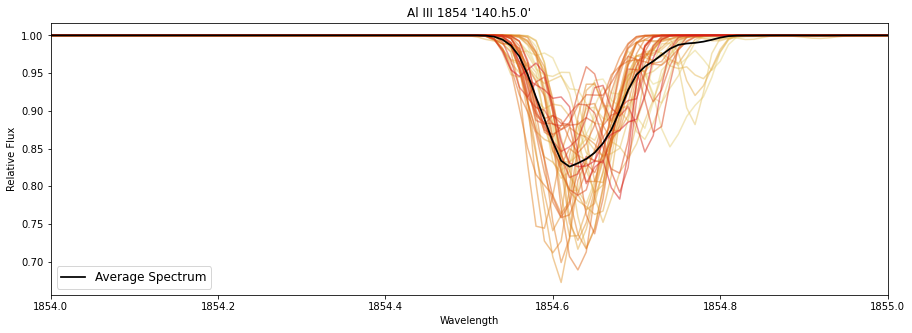

In [39]:
AlIII = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Al III 1854',1854,1855,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True)

## Fe II 2600

yt : [INFO     ] 2022-02-08 16:25:02,944 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:25:02,947 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:25:03,591 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:25:03,667 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:25:03,667 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:25:03,668 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:25:03,668 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:25:08,086 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:25:08,086 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:25:08,086 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:25:08,087 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:25:08,087 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:25:08,088 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:25:08,098 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:08,102 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:25:08,186 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:25:08,189 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 2043

yt : [INFO     ] 2022-02-08 16:25:12,418 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:12,422 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:25:12,507 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:25:12,510 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1926.51it/s]
yt : [INFO     ] 2022-02-08 16:25:12,552 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:25:12,563 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:25:12,565 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:25:13,199 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:25:13,275 Pa

yt : [INFO     ] 2022-02-08 16:25:16,930 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:25:17,547 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:25:17,622 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:25:17,622 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:25:17,623 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:25:17,623 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:25:17,623 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:25:17,624 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:25:17,634 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:17,638 Identified 

yt : [INFO     ] 2022-02-08 16:25:21,841 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:25:21,842 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:25:21,843 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:25:21,852 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:21,856 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:25:22,028 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:25:22,032 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1874.10it/s]
yt : [INFO     ] 2022-02-08 16:25:22,074 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:25:22,087 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:25:22,

Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1847.68it/s]
yt : [INFO     ] 2022-02-08 16:25:26,323 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:25:26,335 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:25:26,336 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:25:26,945 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:25:27,020 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:25:27,021 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:25:27,021 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:25:27,021 Parameters: domain_right_edge         = [6.

yt : [INFO     ] 2022-02-08 16:25:31,338 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:25:31,338 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:25:31,338 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:25:31,339 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:25:31,339 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:25:31,340 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:25:31,350 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:31,354 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:25:31,443 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:25:31,446 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1824

yt : [INFO     ] 2022-02-08 16:25:35,630 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:25:35,634 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:25:35,723 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:25:35,726 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1479.96it/s]
yt : [INFO     ] 2022-02-08 16:25:35,774 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:25:35,786 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:25:35,787 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:25:36,423 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:25:36,499 Pa

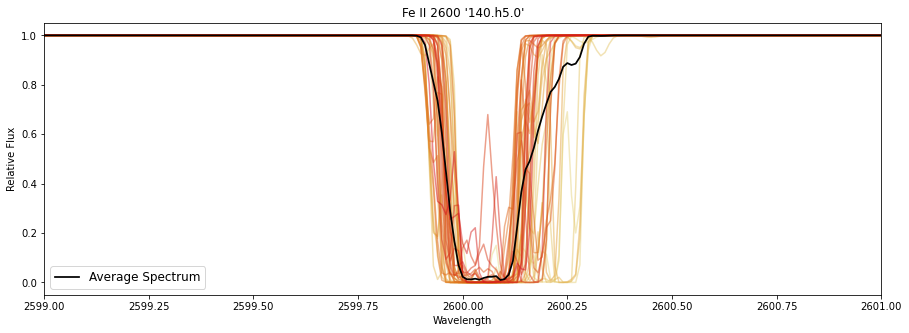

In [40]:
FeII = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Fe II 2600',2599, 2601,
                el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, 
                amu=55.85,DIY=True)

## Mg II 2796

yt : [INFO     ] 2022-02-08 16:36:48,199 Getting segment at z = 0.0: [0.455  0.3    0.2475] unitary to [0.455  0.35   0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:36:48,202 Getting subsegment: [0.45500000000000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.45500000000000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:36:48,922 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:36:49,003 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:36:49,004 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:36:49,004 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:36:49,004 Parameters: domain_right_edge    

yt : [INFO     ] 2022-02-08 16:36:53,614 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:36:53,614 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:36:53,614 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:36:53,615 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:36:53,615 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:36:53,616 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:36:53,626 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:36:53,630 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:36:53,720 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:36:53,723 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1783

yt : [INFO     ] 2022-02-08 16:36:58,122 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:36:58,126 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:36:58,216 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:36:58,219 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1465.02it/s]
yt : [INFO     ] 2022-02-08 16:36:58,269 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:36:58,281 Getting segment at z = 0.0: [0.46085938 0.3        0.25140625] unitary to [0.46085938 0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:36:58,282 Getting subsegment: [0.46085937500000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.46085937500000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:36:58,911 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:36:58,987 Pa

yt : [INFO     ] 2022-02-08 16:37:02,670 Getting subsegment: [0.46476562500000007 unitary, 0.3 unitary, 0.249453125 unitary] to [0.46476562500000007 unitary, 0.35 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 16:37:03,298 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:37:03,373 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:37:03,374 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:37:03,374 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:37:03,374 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:37:03,375 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:37:03,375 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:37:03,385 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:37:03,389 Identified 

yt : [INFO     ] 2022-02-08 16:37:07,883 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:37:07,883 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:37:07,884 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:37:07,895 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:37:07,899 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:37:07,984 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:37:07,987 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1680.46it/s]
yt : [INFO     ] 2022-02-08 16:37:08,033 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:37:08,045 Getting segment at z = 0.0: [0.46867188 0.3        0.24945312] unitary to [0.46867188 0.35       0.24945312] unitary.
yt : [INFO     ] 2022-02-08 16:37:08,

Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1619.01it/s]
yt : [INFO     ] 2022-02-08 16:37:12,493 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:37:12,505 Getting segment at z = 0.0: [0.47257813 0.3        0.2475    ] unitary to [0.47257813 0.35       0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 16:37:12,506 Getting subsegment: [0.47257812500000007 unitary, 0.3 unitary, 0.24750000000000003 unitary] to [0.47257812500000007 unitary, 0.35 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:37:13,156 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:37:13,237 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:37:13,237 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:37:13,238 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:37:13,238 Parameters: domain_right_edge         = [6.

yt : [INFO     ] 2022-02-08 16:37:17,685 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:37:17,686 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:37:17,686 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:37:17,687 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 16:37:17,687 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 16:37:17,688 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 16:37:17,699 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:37:17,702 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:37:17,793 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:37:17,796 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1654

yt : [INFO     ] 2022-02-08 16:37:22,229 Allocating for 2.700e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 16:37:22,233 Identified 3.300e+01 octs
yt : [INFO     ] 2022-02-08 16:37:22,320 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 16:37:22,323 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 27/27 [00:00<00:00, 1751.98it/s]
yt : [INFO     ] 2022-02-08 16:37:22,367 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 16:37:22,379 Getting segment at z = 0.0: [0.4784375  0.3        0.25140625] unitary to [0.4784375  0.35       0.25140625] unitary.
yt : [INFO     ] 2022-02-08 16:37:22,380 Getting subsegment: [0.47843750000000007 unitary, 0.3 unitary, 0.25140625 unitary] to [0.47843750000000007 unitary, 0.35 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 16:37:23,016 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 16:37:23,095 Pa

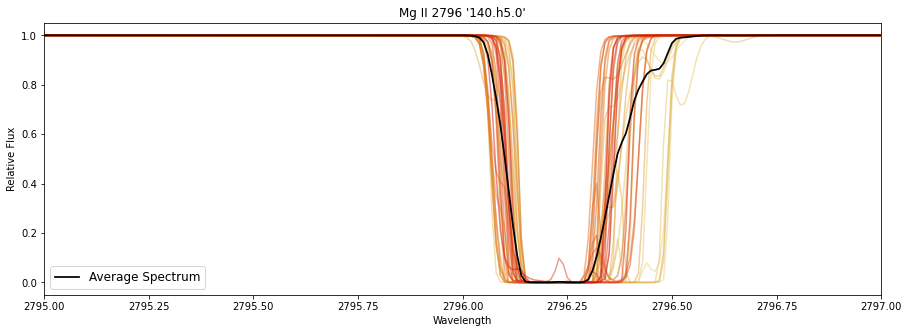

In [41]:
MgII = spec_avg(0.91,0.6,0.495,0.91,0.7,0.495, 13,3, 'Mg II 2796',2795, 2797,
                el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, 
                amu=24.31,DIY=True)